In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame=False)
X_train,y_train = mnist.data[:60_000],mnist.target[:60_000]
X_test,y_test = mnist.data[60_000:],mnist.target[60_000:]

In [16]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)

In [17]:
%time rnd_clf.fit(X_train,y_train)

CPU times: total: 41.5 s
Wall time: 41.7 s


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9705

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [22]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100,random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced,y_train)

CPU times: total: 1min 55s
Wall time: 1min 56s


RandomForestClassifier(random_state=42)

In [ ]:
X_test_reduced = pca.transform()

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9488

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train,y_train)

CPU times: total: 2min 8s
Wall time: 2min 27s


SGDClassifier(random_state=42)

In [27]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.874

In [29]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced,y_train)

CPU times: total: 26.9 s
Wall time: 31.3 s


SGDClassifier(random_state=42)

In [30]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.8959

In [31]:
X_sample,y_sample = X_train[:5000],y_train[:5000]

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,init='random',learning_rate='auto',
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: total: 1min 54s
Wall time: 26.4 s


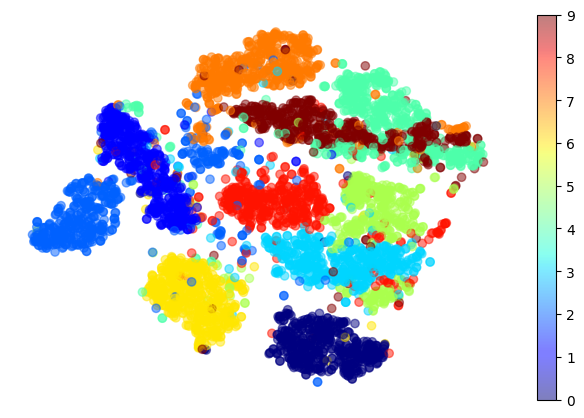

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.scatter(X_reduced[:,0],X_reduced[:,1],
            c=y_sample.astype(np.int8),cmap='jet',alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

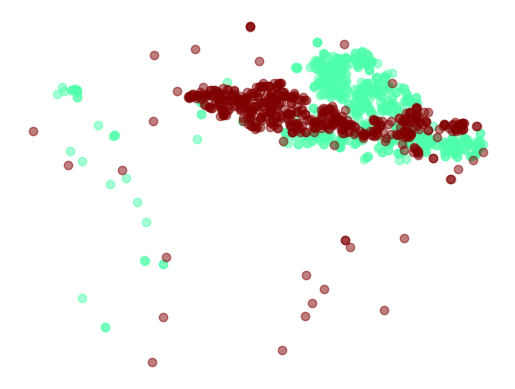

In [38]:
plt.Figure(figsize=(9,9))
cmap = plt.cm.jet
for digit in ('4','9'):
    plt.scatter(X_reduced[y_sample == digit,0],X_reduced[y_sample == digit,1],
                c=[cmap(float(digit)/9)],alpha=0.5)
plt.axis('off')
plt.show()

In [47]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

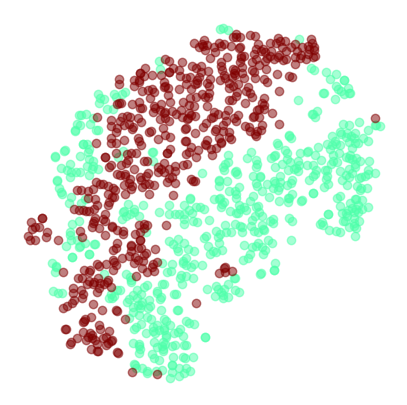

In [48]:
plt.figure(figsize=(5,5))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

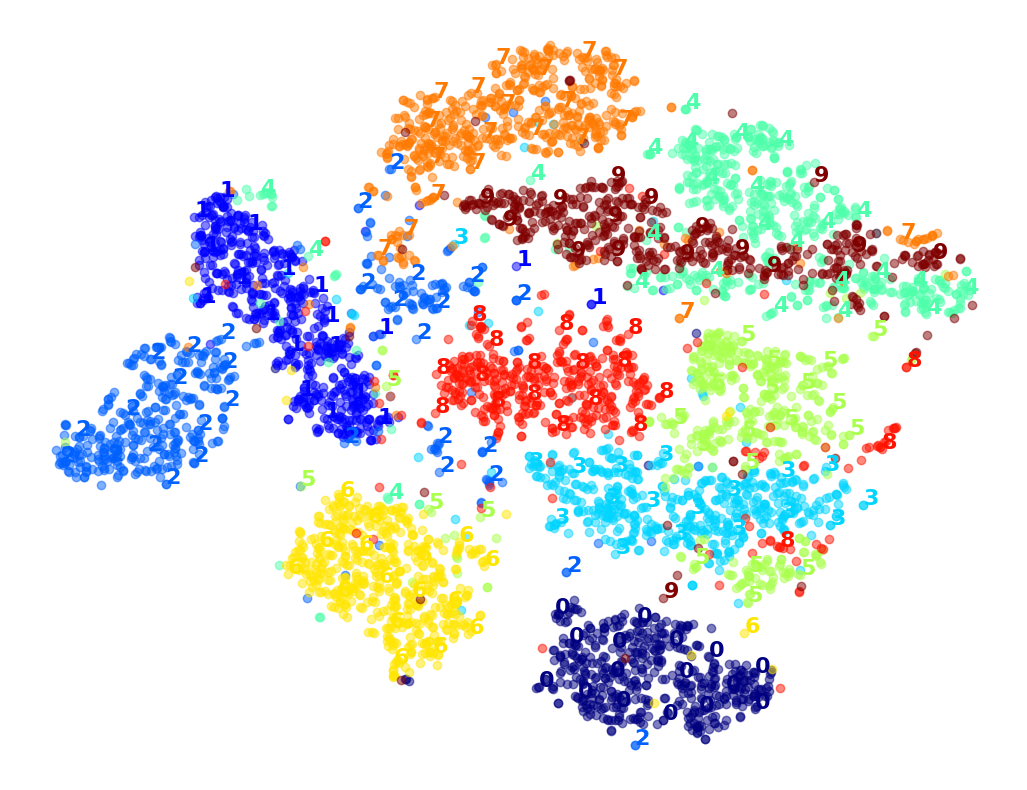

In [53]:
plot_digits(X_reduced,y_sample)

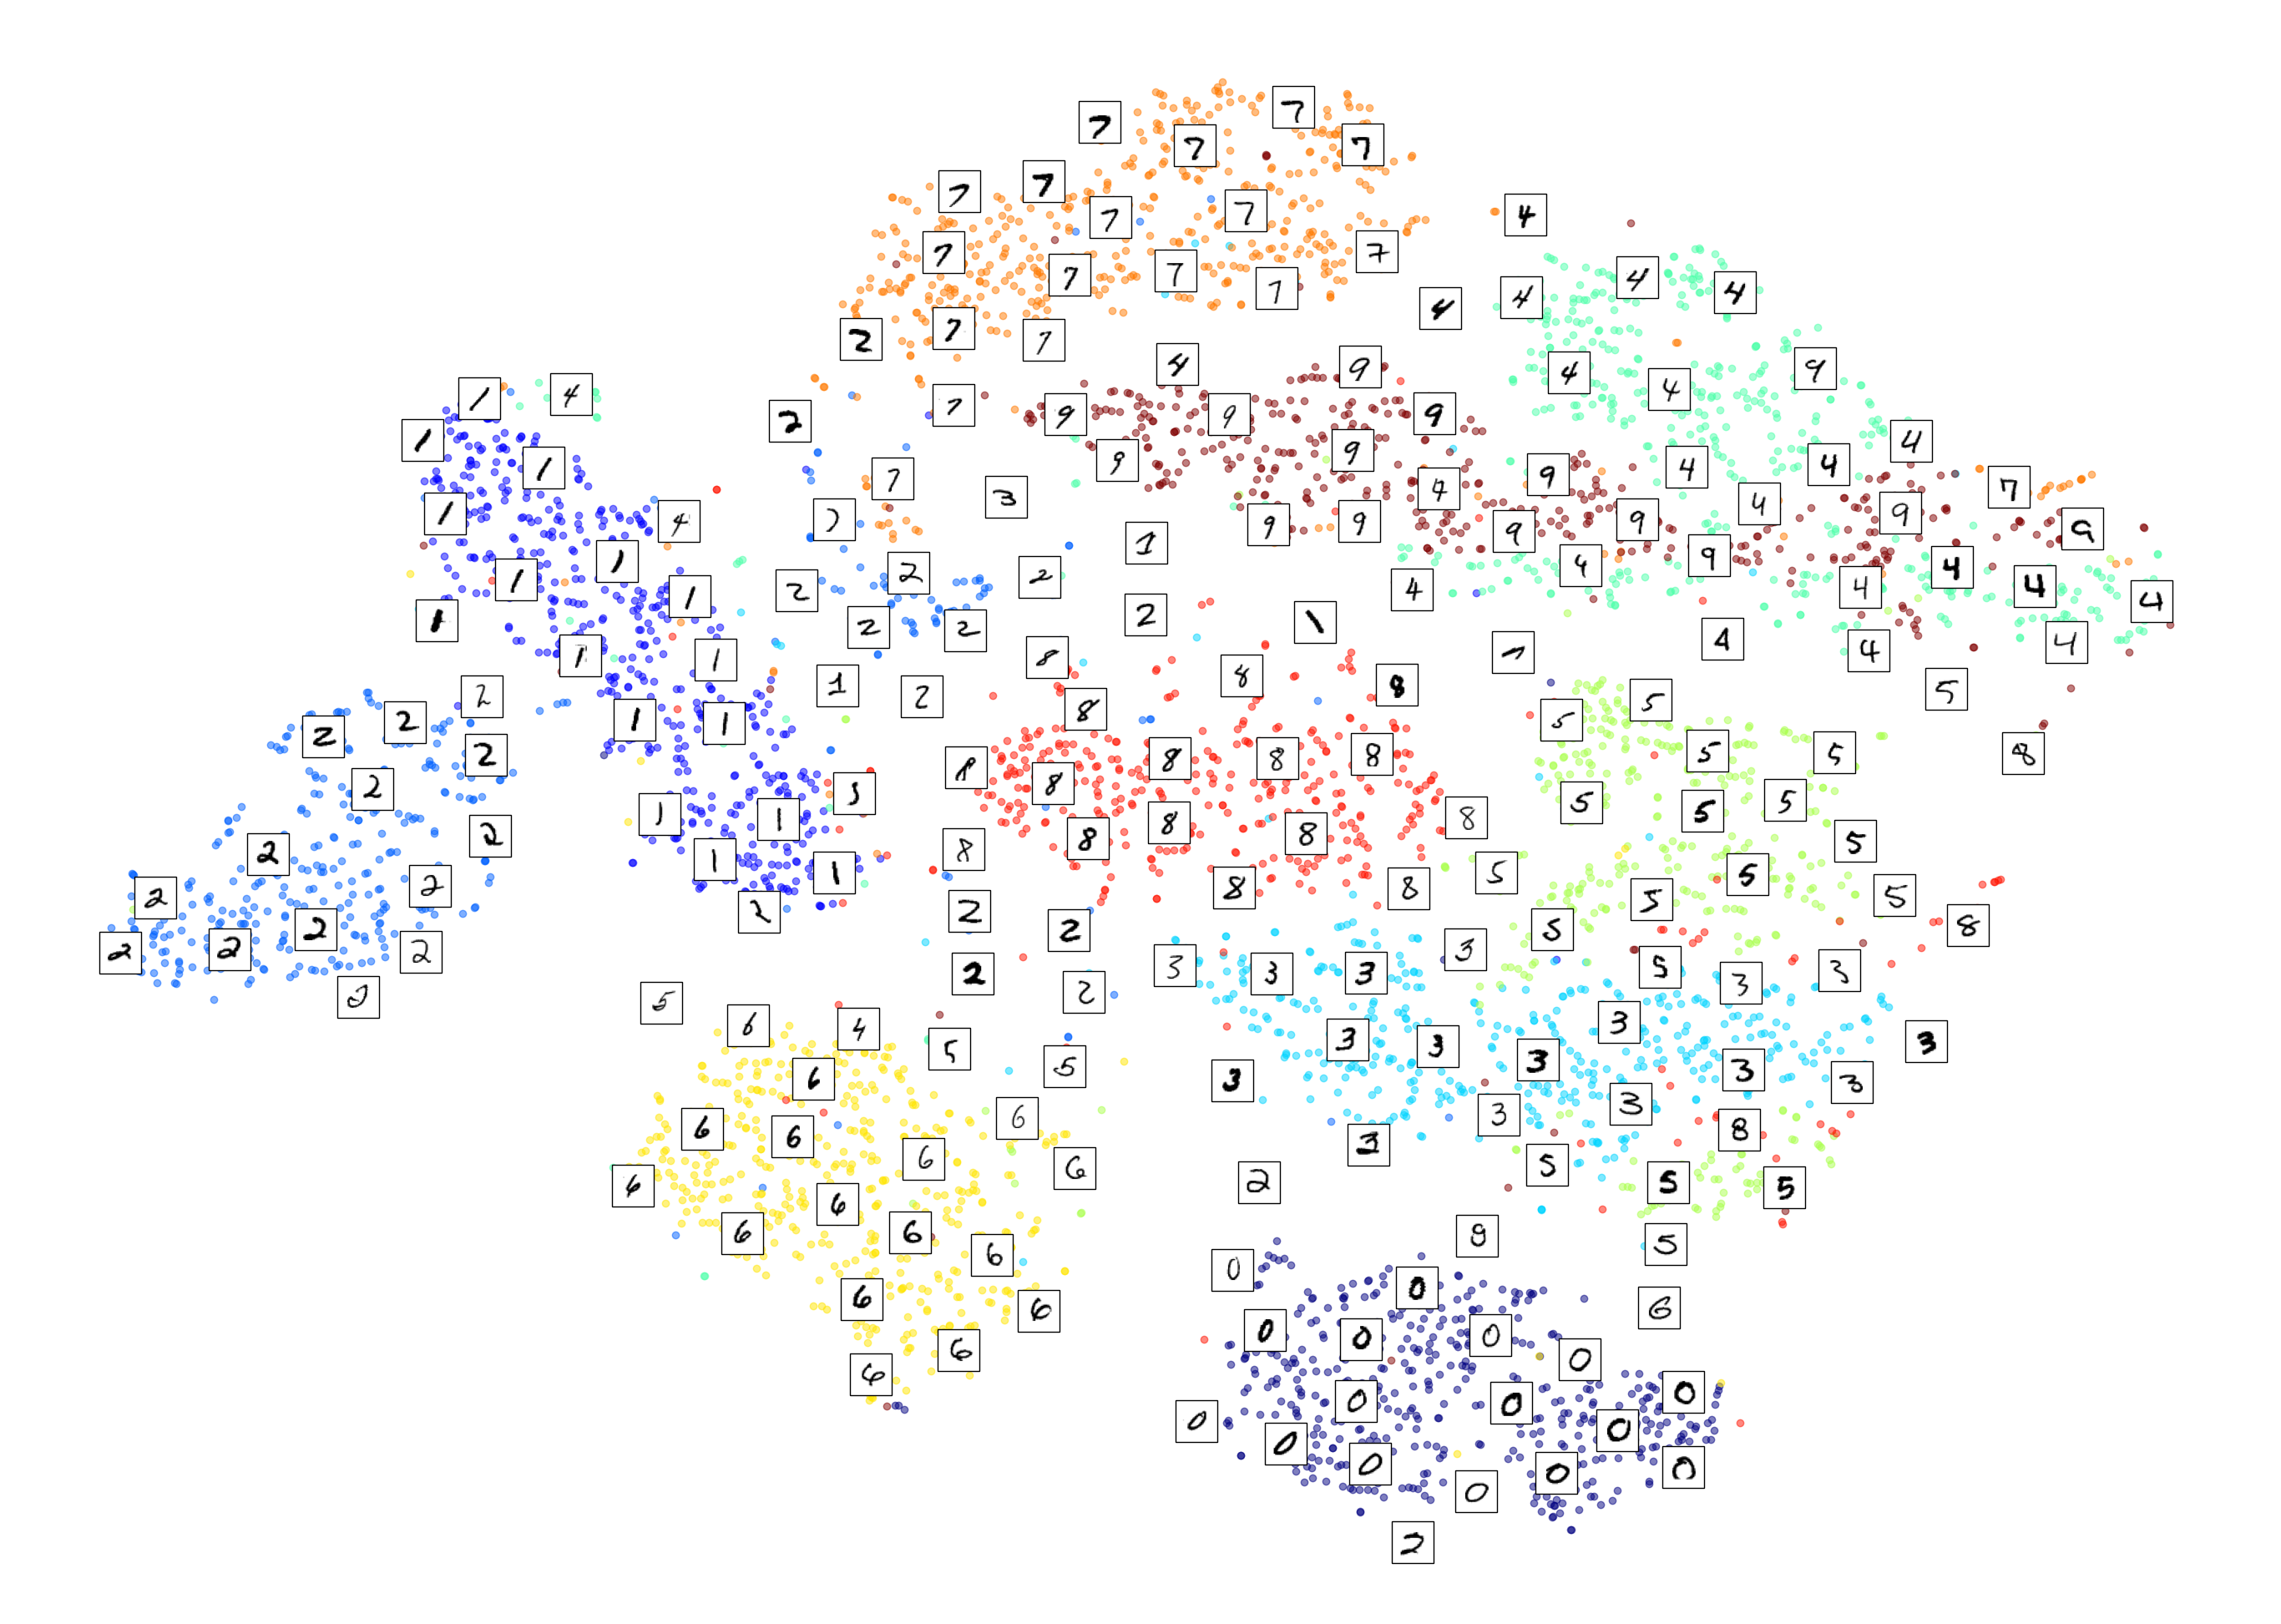

In [54]:
plot_digits(X_reduced,y_sample,images=X_sample,figsize=(35,25))

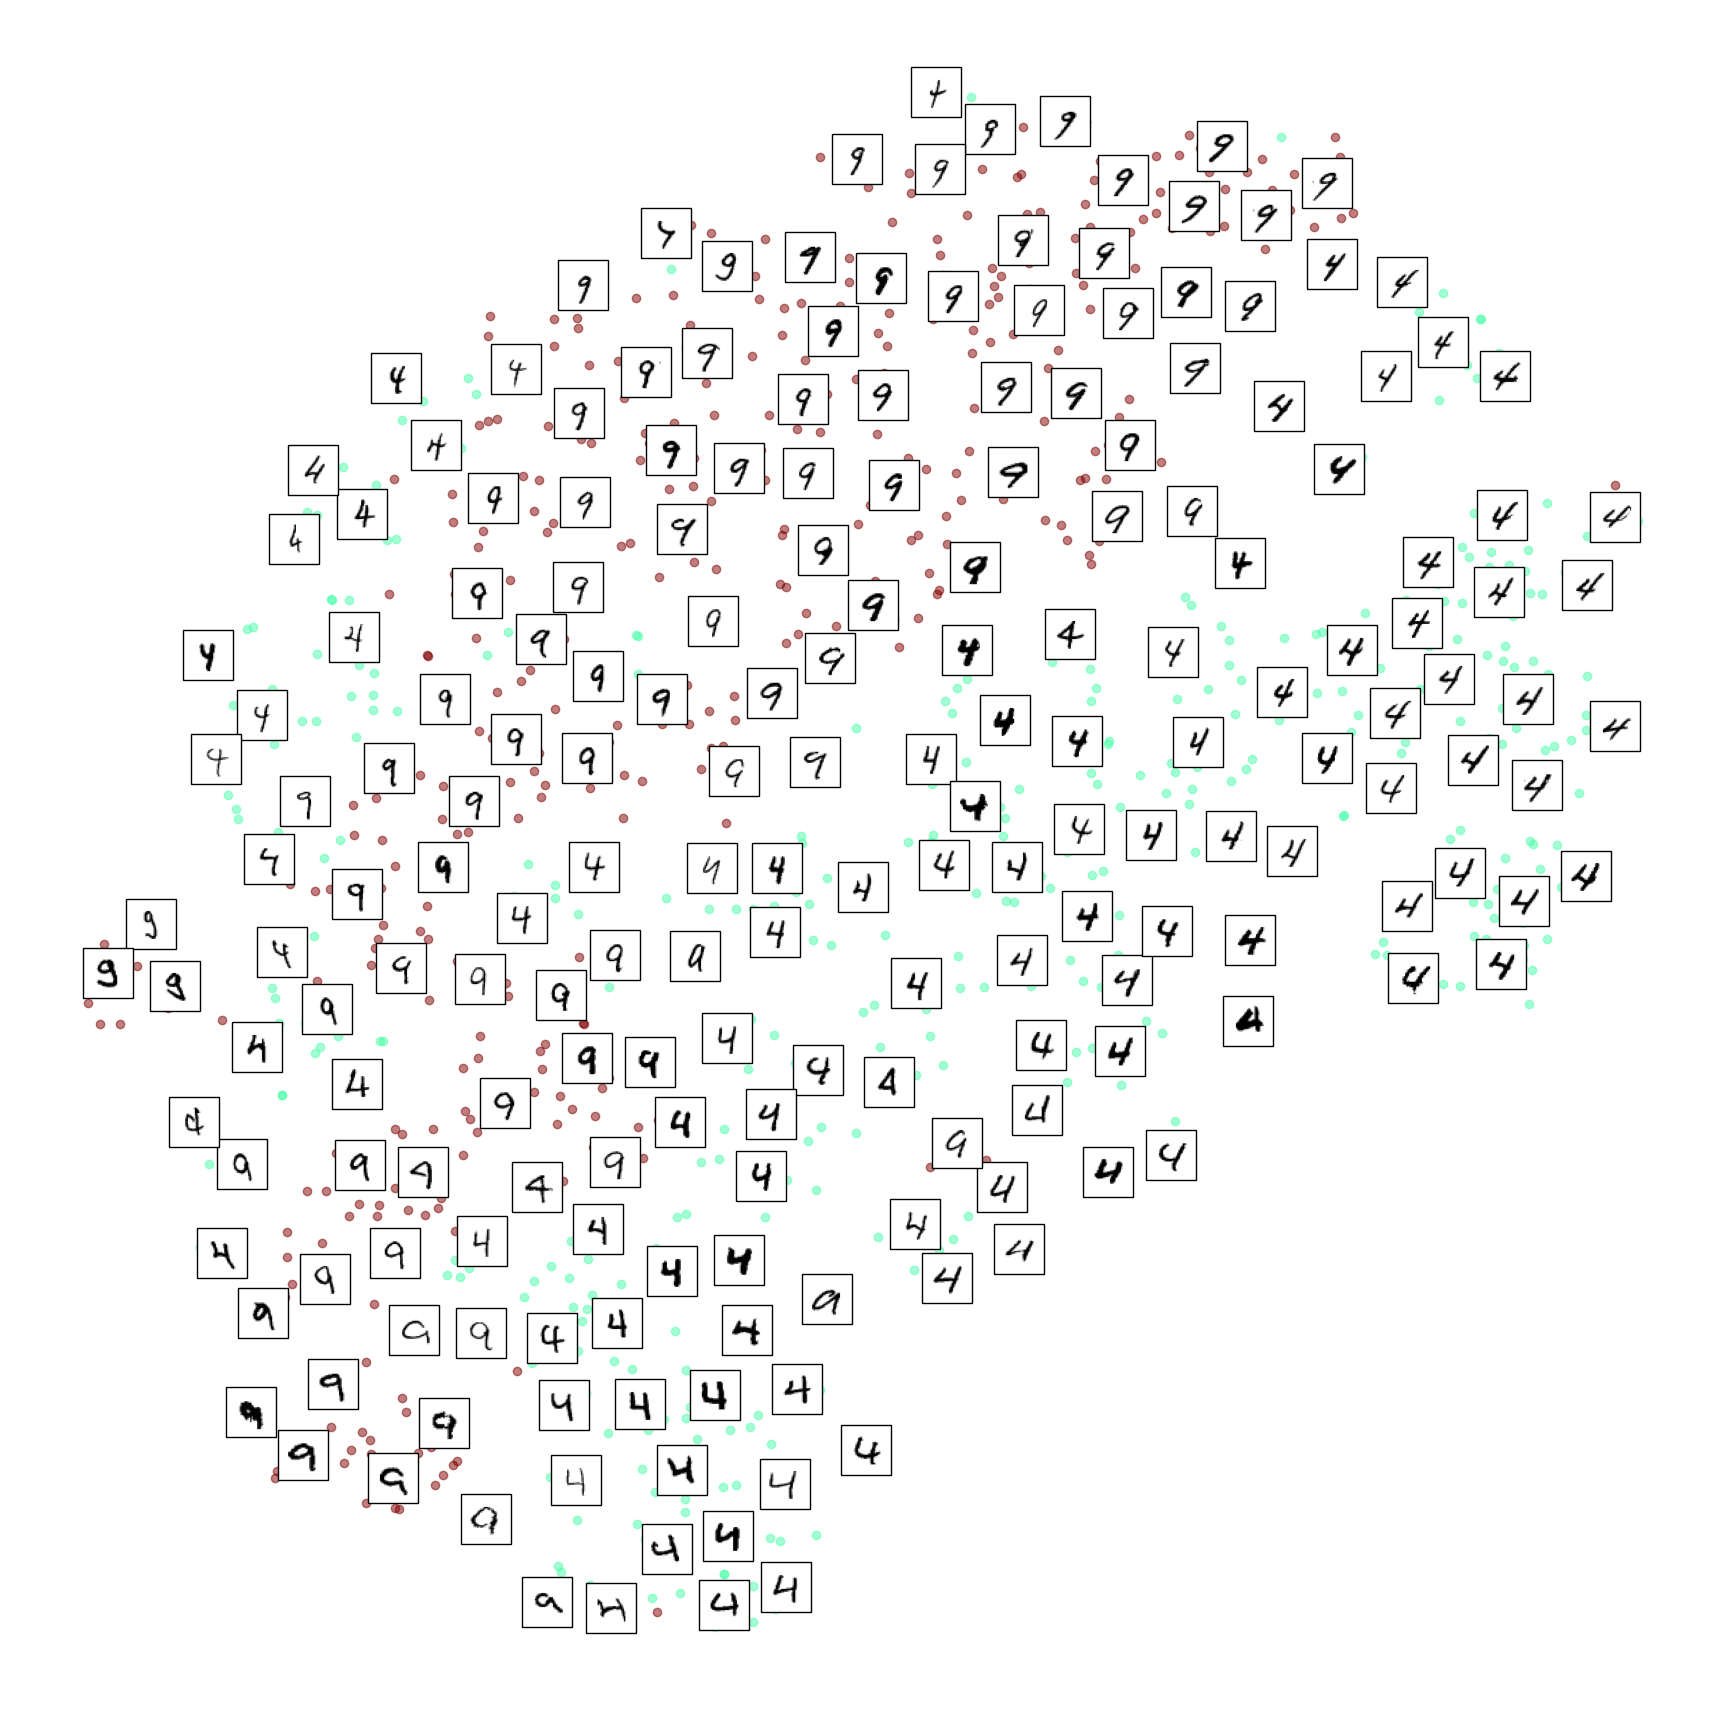

In [55]:
plot_digits(X_subset_reduced,y_subset,images=X_subset,figsize=(22,22))

CPU times: total: 562 ms
Wall time: 279 ms


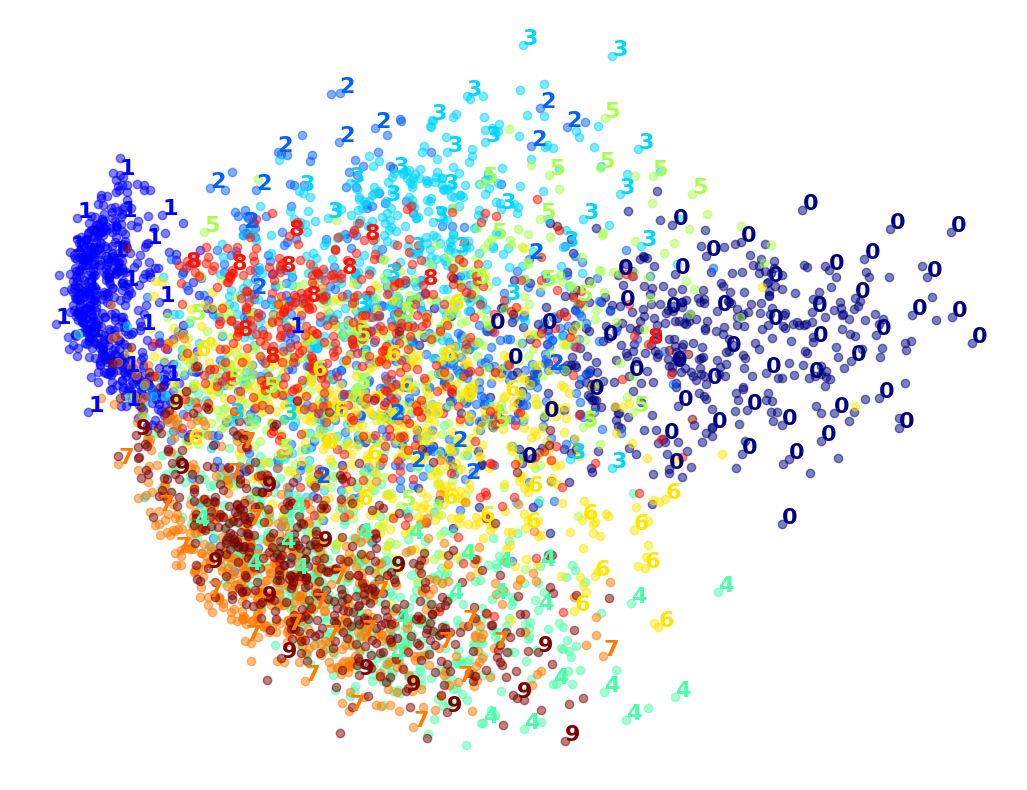

In [58]:
pca = PCA(n_components=2,random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced,y_sample)
plt.show()

CPU times: total: 3.86 s
Wall time: 2.37 s


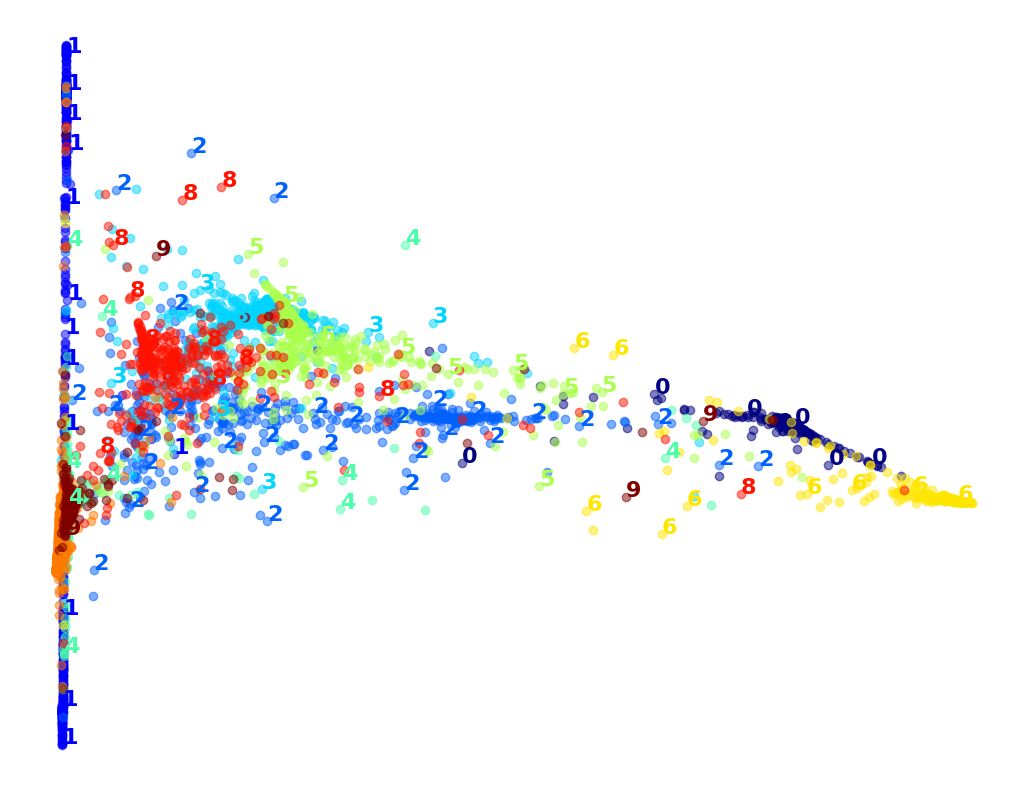

In [61]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2,random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced,y_sample)
plt.show()

CPU times: total: 6.55 s
Wall time: 2.34 s


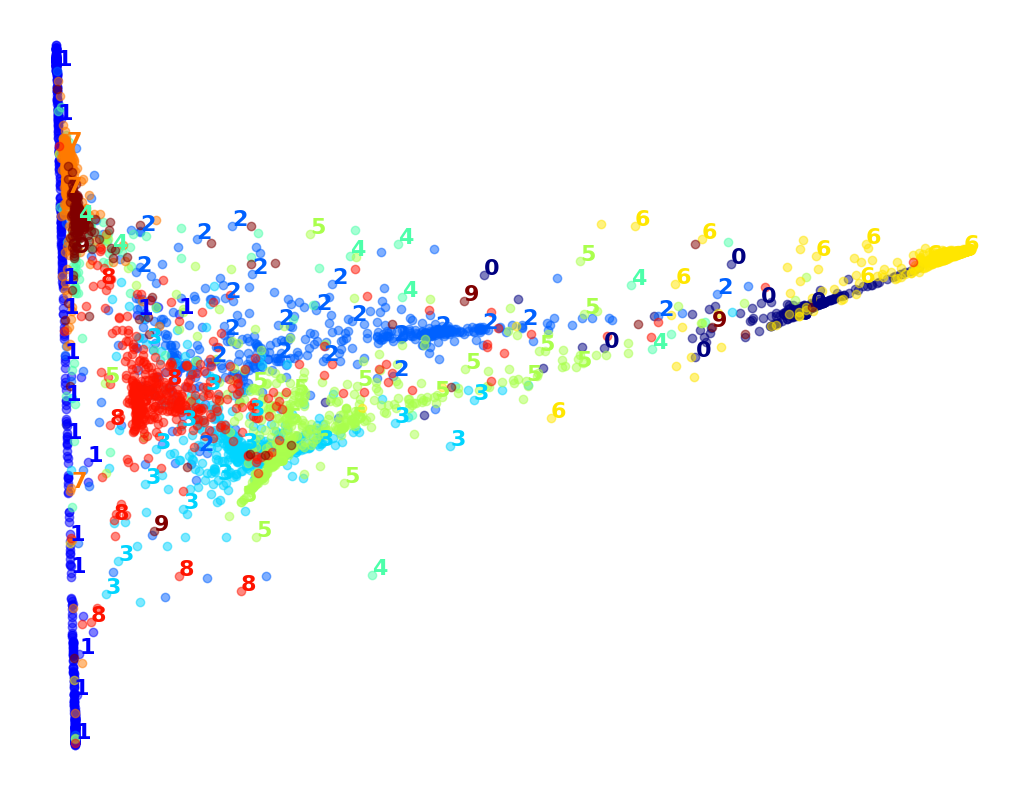

In [62]:
from sklearn.pipeline import make_pipeline

pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2,random_state=42))
%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced,y_sample)
plt.show()

In [ ]:
from sklearn.manifold import MDS
%time X_mds_reduced = MDS(n_components=2, normalized_stress=False, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()
# Look figure in collab notebook

In [ ]:
pca_mds = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    MDS(n_components=2, normalized_stress=False, random_state=42)
)

%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()
# Look figure in the collab notebook

CPU times: total: 7.66 s
Wall time: 4.35 s


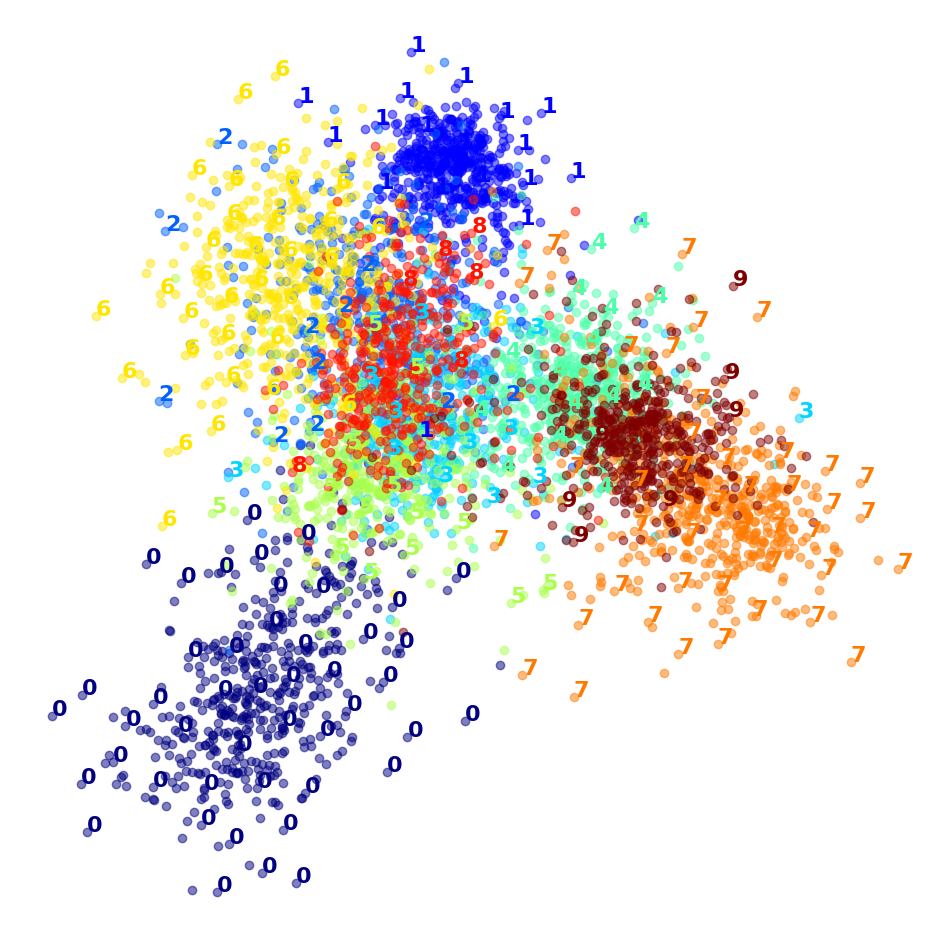

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample,y_sample)
plot_digits(X_lda_reduced,y_sample,figsize=(12,12))
plt.show()